<a href="https://colab.research.google.com/github/Stella-kimani/Week-6-IP/blob/master/Copy_of_Stella_Kimani_Independent_python_notebook_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.The Overview 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

2.Metric for success

The metric for success will be  determined by building models where the accuracy is more than 70%.


3.Understanding the context

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.[1] The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.

The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams

4.Recording experimetal design

Expected flow for the assessment:

1.Perform your Exploratory Data Analysis

2.Perform any necessary feature engineering 

3.Check of multicollinearity

4.Start building the model

5.Cross-validate the model

6.Compute Root mean squared error

7.Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
8.Perform appropriate polynomial and logistic regressions on the data including your justification

8.Challenging  the solution by providing insights on how you can make improvements.

External validation

This dataset Fifa ranking is valid and can be found here.

A more detailed explanation and history of the rankings is available here: https://en.wikipedia.org/wiki/FIFA_World_Rankings

An explanation of the ranking procedure is available here: https://www.fifa.com/fifa-world-ranking/procedure/men




In [ ]:
# Importing the necessary  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading the dataset
# First i will start with the fifa dataset
fifa = pd.read_csv('fifa_ranking.csv')
sns.set_style()

In [ ]:
# Previewing the Dataset
# ---
#
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#Previewing the bottom of our dataset
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
#Checking the shape of the data set(rows and columns)
fifa.shape


(57793, 16)

This dataset has 57793 rows and 16 columns

In [ ]:
# checking the column names of our dataset
fifa.columns
#This shows the all my 16 columns in the fifa ranking dataset

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
# Understanding datatypes the dataset
fifa.dtypes
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

This displays the datatype of each columns

In [ ]:
#Looking for null values
fifa.isnull().sum()
#The dataset has no null values

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
# Loading the dataset
# I then load the results dataset
results_df = pd.read_csv('results.csv')


In [ ]:
# Previewing the Dataset
# ---
#
results_df.head()
#This displays the first 5 entries

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#Previewing the bottom of our dataset
results_df.tail()
#This displays last 5 entries

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
results_df.info()
#This gives a better understanding of the column datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
#Checking for null values
results_df.isnull().sum()
#There are no null values in this dataset.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# check for duplicates in fifa dataset
fifa.duplicated().sum()


37

It seems that there are duplicates in the fifa dataset, i will drop them.

In [ ]:
# check for duplicates in results dataset
results_df.duplicated().sum()

0

In [ ]:
# Drop the duplicates in fifa dataset
fifa = fifa.drop_duplicates()

In [ ]:
#Confirm that the duplicates have been dropped in fifa dataset
fifa.shape
# The duplicates have been dropped number of entries reducedfrom 57793 entries to 57756

(57756, 16)

6.Work with a merged dataset.

I have to merge my Results dataset and fifa dataset.

In [ ]:

df = results_df.merge(fifa, how = 'inner', left_on = ['date', 'home_team'], right_on = ['rank_date', 'country_full'])
df.head()
# now to get the rank of the away team on the day of the match
df = df.merge(fifa, how = 'inner' ,left_on = ['date', 'away_team'], right_on = ['rank_date', 'country_full'],suffixes=('_home', '_away'))
df.head()
#df.info
#My final dataset now has  871 columns. Since it is an inner join it ignores values that do not match in the 2 dataframes so it does not include replicated data.
#An inner join allows me to merge different recors based on whether it is a left join or a right join.
#An outer join will result in different records not matching so it results in NAN values


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,country_full_home,country_abrv_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation_home,rank_date_home,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,confederation_away,rank_date_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,14,Mexico,MEX,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,94,Venezuela,VEN,0.0,4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,86,Sierra Leone,SLE,0.0,16,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#This code splits my date column to year 
df["Year"] =pd.to_datetime(fifa["rank_date"]).dt.year

In [ ]:
df[df.home_team == 'Bolivia']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,country_full_home,country_abrv_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation_home,rank_date_home,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,confederation_away,rank_date_away,Year
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993
54,1997-06-18,Bolivia,Uruguay,1,0,Copa América,La Paz,Bolivia,False,34,Bolivia,BOL,0.0,48,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1997-06-18,51,Uruguay,URU,0.0,43,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1997-06-18,1993
209,2000-11-15,Bolivia,Uruguay,0,0,FIFA World Cup qualification,La Paz,Bolivia,False,66,Bolivia,BOL,0.0,505,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,2000-11-15,36,Uruguay,URU,0.0,582,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,2000-11-15,1993
706,2010-08-11,Bolivia,Colombia,1,1,Friendly,La Paz,Bolivia,False,50,Bolivia,BOL,0.0,570,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,2010-08-11,36,Colombia,COL,0.0,725,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,2010-08-11,1993


In [ ]:
#Check for any missing values
df.isnull().sum()
#After the merge there are no null values.

date                            0
home_team                       0
away_team                       0
home_score                      0
away_score                      0
tournament                      0
city                            0
country                         0
neutral                         0
rank_home                       0
country_full_home               0
country_abrv_home               0
total_points_home               0
previous_points_home            0
rank_change_home                0
cur_year_avg_home               0
cur_year_avg_weighted_home      0
last_year_avg_home              0
last_year_avg_weighted_home     0
two_year_ago_avg_home           0
two_year_ago_weighted_home      0
three_year_ago_avg_home         0
three_year_ago_weighted_home    0
confederation_home              0
rank_date_home                  0
rank_away                       0
country_full_away               0
country_abrv_away               0
total_points_away               0
previous_point

There are no null values in the merged dataset

In [ ]:
#Check for any duplicates in the merged dataset.
df.duplicated().any()

False

There are no duplicates in my dataset.

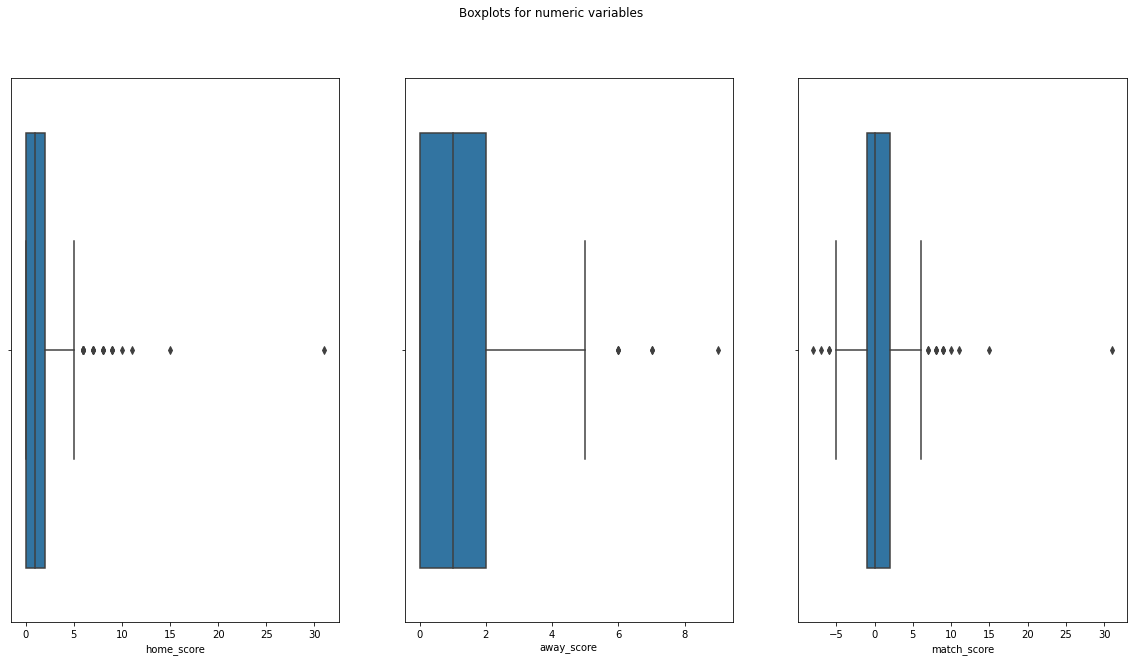

In [ ]:
#checking for outliers

fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(df['home_score'], ax=ax1)
sns.boxplot(df['away_score'], ax=ax2)
sns.boxplot(df['match_score'], ax=ax3)

plt.show()

#our dataset has outliers
# I will keep outliers since this is a predictive model.


6.Exploratory Data Analysis

In [ ]:
df.tournament.value_counts()
#This gives me the number of tournaments in the dataset

Friendly                                      574
FIFA World Cup qualification                  134
UEFA Euro qualification                        37
AFC Asian Cup qualification                    31
Cyprus International Tournament                 8
Gulf Cup                                        7
AFF Championship                                7
Copa América                                    6
CECAFA Cup                                      6
Gold Cup                                        5
African Cup of Nations qualification            5
African Cup of Nations                          4
AFC Asian Cup                                   4
SAFF Cup                                        4
King's Cup                                      3
African Nations Championship                    3
United Arab Emirates Friendship Tournament      3
Malta International Tournament                  3
CFU Caribbean Cup                               2
CFU Caribbean Cup qualification                 2


In [ ]:
#Here i an creating a new column tournament type to hold the 3 types of tournaments we need
tourn_type = []
for value in df["tournament"]:
   if value == 'Friendly':
     tourn_type.append('Friendly')
   elif value == "FIFA World Cup qualification":
     tourn_type.append("World_cup")
   else:
     tourn_type.append("Others")  
df["tourn_type"] = tourn_type


In [ ]:
print(df)

           date home_team     away_team  ...  rank_date_away  Year tourn_type
0    1993-08-08   Bolivia       Uruguay  ...      1993-08-08  1993  World_cup
1    1993-08-08    Brazil        Mexico  ...      1993-08-08  1993   Friendly
2    1993-08-08   Ecuador     Venezuela  ...      1993-08-08  1993  World_cup
3    1993-08-08    Guinea  Sierra Leone  ...      1993-08-08  1993   Friendly
4    1993-08-08  Paraguay     Argentina  ...      1993-08-08  1993  World_cup
..          ...       ...           ...  ...             ...   ...        ...
866  2018-06-07   England    Costa Rica  ...      2018-06-07  1994   Friendly
867  2018-06-07   Uruguay    Uzbekistan  ...      2018-06-07  1994   Friendly
868  2018-06-07  Portugal       Algeria  ...      2018-06-07  1994   Friendly
869  2018-06-07   Iceland         Ghana  ...      2018-06-07  1994   Friendly
870  2018-06-07     India   New Zealand  ...      2018-06-07  1994     Others

[871 rows x 43 columns]


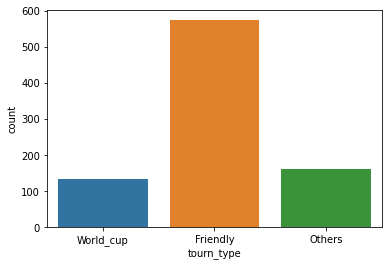

In [ ]:
sns.countplot(df['tourn_type'])
# It seems like the highest count is for the friendly matches at 574

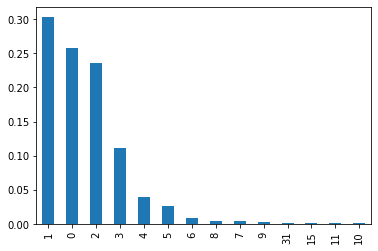

In [ ]:
# Plotting home_score to see the count 
(df['home_score'].value_counts()/len(df)).plot.bar()

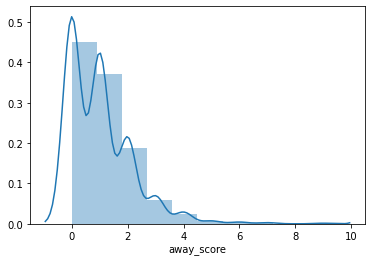

In [ ]:
# Ditribution plot for away_score
sns.distplot(df['away_score'], bins=10) 
#This distribution plot shows the how the away team scored

In [ ]:
#Create  a column that shows scores that shows a win , loss or draw
df["match_score"] = df['home_score'] - df['away_score']
df["match_score"]

0      2
1      0
2      5
3      1
4     -2
      ..
866    2
867    3
868    3
869    0
870   -1
Name: match_score, Length: 871, dtype: int64

In [ ]:
#def result(x):
 # if match_score > 0:
  #  return 'Win'
 # elif match_score < 0:
 #   return 'Lose'
 # else:
  #  return 'Draw'

In [ ]:
result = []
for match_score in df['match_score']:
  if match_score > 0:
    result.append("Win")
  elif match_score < 0:
    result.append("Lose")
  else:
    result.append("Draw")  
df['result'] = result
print(df)

           date home_team     away_team  ...  tourn_type  match_score result
0    1993-08-08   Bolivia       Uruguay  ...   World_cup            2    Win
1    1993-08-08    Brazil        Mexico  ...    Friendly            0   Draw
2    1993-08-08   Ecuador     Venezuela  ...   World_cup            5    Win
3    1993-08-08    Guinea  Sierra Leone  ...    Friendly            1    Win
4    1993-08-08  Paraguay     Argentina  ...   World_cup           -2   Lose
..          ...       ...           ...  ...         ...          ...    ...
866  2018-06-07   England    Costa Rica  ...    Friendly            2    Win
867  2018-06-07   Uruguay    Uzbekistan  ...    Friendly            3    Win
868  2018-06-07  Portugal       Algeria  ...    Friendly            3    Win
869  2018-06-07   Iceland         Ghana  ...    Friendly            0   Draw
870  2018-06-07     India   New Zealand  ...      Others           -1   Lose

[871 rows x 45 columns]


When we apply the function and check again my df, i confirm that the win, lose and draw criteria has been added.Check for new columns called match score and result

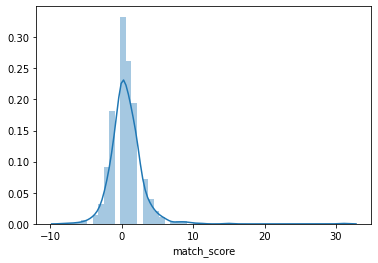

In [ ]:
# Ditribution plot for match_score
sns.distplot(df['match_score']) 

In [ ]:
#Dropping unnecessary columns
df.drop(columns = ['rank_date_home','country', 'city','rank_date_away', 'date', 'confederation_home','confederation_away'],axis= 1, inplace =True)

In [ ]:
df.drop(columns = ['neutral',	'country_full_home',	'country_abrv_home',	'total_points_home',	'previous_points_home',	'cur_year_avg_home',	'cur_year_avg_weighted_home',	'last_year_avg_home',	'last_year_avg_weighted_home',	'two_year_ago_avg_home',	'two_year_ago_weighted_home',	'three_year_ago_avg_home',	'three_year_ago_weighted_home'], axis = 1, inplace = True)

In [ ]:
df.drop(columns = ['country_full_away',	'country_abrv_away',	'total_points_away',	'previous_points_away',	'cur_year_avg_away',	'cur_year_avg_weighted_away',	
                   'last_year_avg_away',	'last_year_avg_weighted_away',	'two_year_ago_avg_away',	'two_year_ago_weighted_away',	'three_year_ago_avg_away',
                   'three_year_ago_weighted_away'], axis = 1, inplace = True)

In [ ]:
#I have verified that new columns have been drppped.
df.head()

,home_team,away_team,home_score,away_score,tournament,rank_home,rank_change_home,rank_away,rank_change_away,Year,tourn_type,match_score,result
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,28,22,-6,1993,World_cup,2,Win
1,Brazil,Mexico,1,1,Friendly,8,-5,14,11,1993,Friendly,0,Draw
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,30,94,31,1993,World_cup,5,Win
3,Guinea,Sierra Leone,1,0,Friendly,65,-2,86,-7,1993,Friendly,1,Win
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,1,5,5,1993,World_cup,-2,Lose


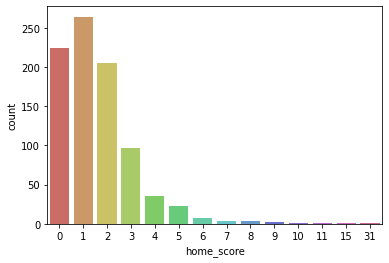

In [ ]:

# Since we are building a model to predict A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.
# our target is going to be match_score variable from the merged dataframe. 
# To make sure that i have binary variables, i will Seaborn's countplot() function.
# 
sns.countplot(x='home_score', data=df, palette='hls')



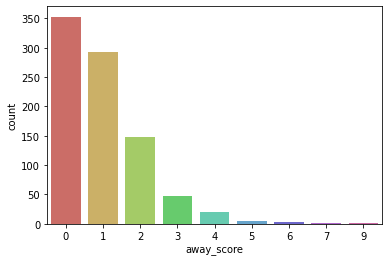

In [ ]:
sns.countplot(x='away_score', data=df, palette='hls')

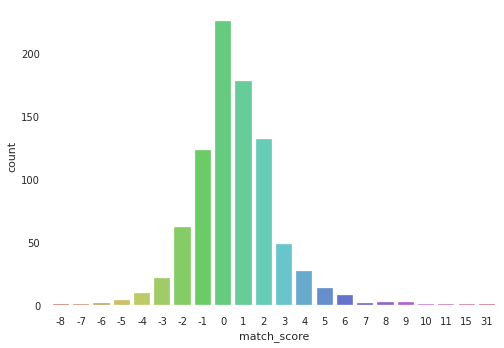

In [ ]:
sns.countplot(x='match_score', data=df, palette='hls')
#This is a countplot of the new column match score which is home_score - away_score

This is a count plot based on the match score which is Home score - away score , 0 represents a draw. If there is a negative on the match score it means home_score is less than away_score and the home_team lost.

7.Feature Engineering

In [ ]:
#Encoding the tourn_type column
tournament_ = {'tourn_type':{'Friendly':1, "World_cup":2, "Others":0}}
df.replace(tournament_, inplace=True)
df["tourn_type"] = df["tourn_type"].astype("int")

In [ ]:
#Encoding the result column
result_ = {'result':{'Win':1, "Lose":2, "Draw":0}}
df.replace(result_, inplace=True)
df["result"] = df["result"].astype("int")

These 2 codes encode the tournament type column and result columns that i created. Tourn type now holds friendly as 1 ,worldcup as 2, others as 0 ,and result column has win as 1, lose as 2, draw as 0

8.Checking for multicolinearity


In [ ]:
#Let me get a correlation matrix of the columns to understand the relationships better
correlation = df.corr()
correlation

,home_score,away_score,rank_home,rank_change_home,rank_away,rank_change_away,Year,tourn_type,match_score,result
home_score,1.000000,-0.132413,-0.043381,0.108316,0.309322,0.021685,0.079328,0.112013,0.874028,-0.063128
away_score,-0.132413,1.000000,0.143060,-0.041702,-0.151524,0.013887,-0.062442,-0.045848,-0.597329,0.447959
rank_home,-0.043381,0.143060,1.000000,-0.027498,0.534618,0.033777,0.054040,-0.083531,-0.105227,0.092063
rank_change_home,0.108316,-0.041702,-0.027498,1.000000,0.026650,0.063618,-0.014969,0.028898,0.108083,0.040951
rank_away,0.309322,-0.151524,0.534618,0.026650,1.000000,-0.026279,0.188256,-0.048517,0.324555,-0.073379
rank_change_away,0.021685,0.013887,0.033777,0.063618,-0.026279,1.000000,0.012561,-0.052965,0.010738,0.055857
Year,0.079328,-0.062442,0.054040,-0.014969,0.188256,0.012561,1.000000,-0.049498,0.094795,0.025035
tourn_type,0.112013,-0.045848,-0.083531,0.028898,-0.048517,-0.052965,-0.049498,1.000000,0.113106,-0.011038
match_score,0.874028,-0.597329,-0.105227,0.108083,0.324555,0.010738,0.094795,0.113106,1.000000,-0.270664
result,-0.063128,0.447959,0.092063,0.040951,-0.073379,0.055857,0.025035,-0.011038,-0.270664,1.000000


The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. I will use these correlations to compute the VIF score for each variable.  I will create a new dataframe with the inverse of the matrix above.

In [ ]:
VIF=pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
VIF

,home_score,away_score,rank_home,rank_change_home,rank_away,rank_change_away,Year,tourn_type,match_score,result
home_score,9.213749e+13,-5.581984e+13,-0.060954,0.051321,0.026325,0.002793,-0.001265,0.054330,-1.138736e+14,-0.380985
away_score,-5.581984e+13,3.381744e+13,-0.067363,-0.033537,-0.038588,-0.005321,0.048005,-0.068690,6.898827e+13,-0.324811
rank_home,-6.249326e-02,-6.643071e-02,1.620733,0.030969,-1.035557,-0.082550,0.066165,0.030745,4.919943e-01,-0.064193
rank_change_home,5.135947e-02,-3.355981e-02,0.030969,1.022612,-0.017713,-0.062221,0.030422,-0.016553,-1.873498e-01,-0.075930
rank_away,2.609367e-02,-3.844802e-02,-1.035557,-0.017713,1.825590,0.095376,-0.223276,0.073779,-7.185144e-01,0.055493
rank_change_away,2.568658e-03,-5.185594e-03,-0.082550,-0.062221,0.095376,1.016419,-0.016868,0.059214,-6.909548e-02,-0.054769
Year,-2.670046e-04,4.740011e-02,0.066165,0.030422,-0.223276,-0.016868,1.048319,0.048486,-2.035854e-02,-0.075249
tourn_type,5.433019e-02,-6.869037e-02,0.030745,-0.016553,0.073779,0.059214,0.048486,1.029212,-2.342500e-01,-0.019102
match_score,-1.138736e+14,6.898827e+13,0.490093,-0.187302,-0.718801,-0.069372,-0.019126,-0.234250,1.407375e+14,0.475490
result,-3.809849e-01,-3.248110e-01,-0.064193,-0.075930,0.055493,-0.054769,-0.075249,-0.019102,4.754896e-01,1.267972


Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal. Home_score has a score of 9.21374, away_score has a score of 3.3817

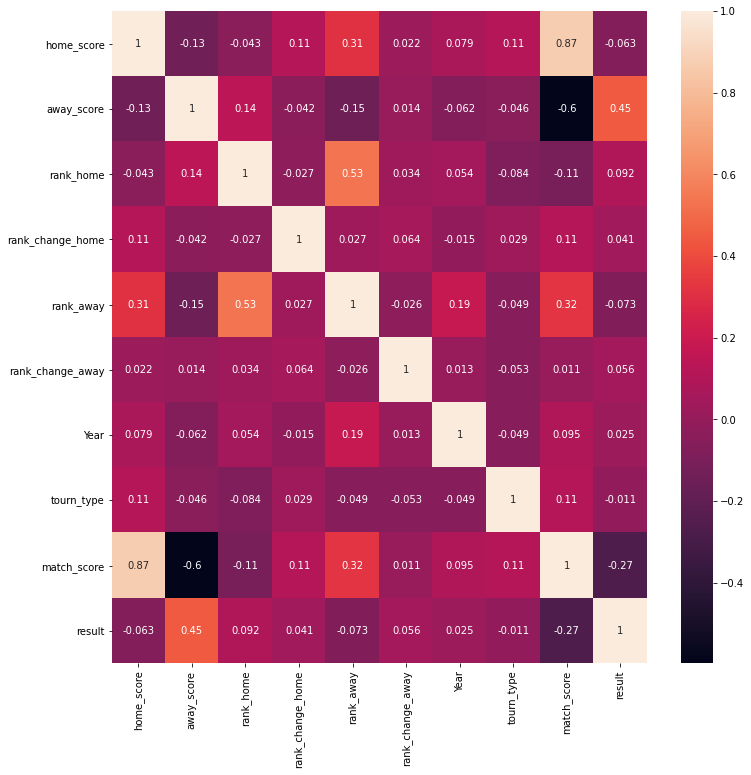

In [ ]:
# Plotting visualisation of the matrix for better clarity 

plt.figure(figsize=(12, 12))  

# Creating our visualisation  
# 
sns.heatmap(correlation, annot = True) 

9.Modelling

In [ ]:
#Model 1 predicting home score
X = df[['rank_home', 'rank_away', 'tourn_type']].values
y = df['home_score'].values

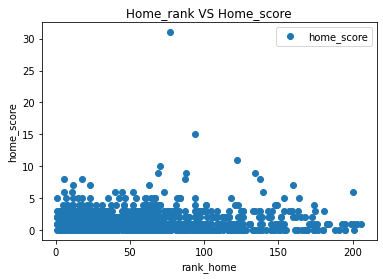

In [ ]:
# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting to see the relationship
df.plot(x='rank_home', y='home_score', style='o')
plt.title('Home_rank VS Home_score')
plt.xlabel('rank_home')
plt.ylabel('home_score')
plt.show()


Observation

From the  plot, the data does not appear to be linear. So if were to fit a simple linear straight line, it would not cover most of the points. Which is why applying Linear regression on this dataset would not give us the correct value.

The other alternative i am left with is applying polynomial regression.

In [ ]:
# Fit polynomial Regression to the dataset
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predict using linear regression
reg_line = LinearRegression()
reg_line.fit(X,y)
lin_pred = reg_line.predict([[35, 94, 2]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[35, 94, 2]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))

Linear prediction: 2
Polynomial prediction: 2


I took ecuador vs venezuela worldcup match results and From my prediction means its a worldcup tournament and  both linear and have predicted 2 goals by the home team.

Cross validation of model 1

In [ ]:
#First i will start by calculating the mean absolute error, mean squared absolute error and root mean squared error for my model.
X = df[['rank_home', 'rank_away', 'tourn_type']].values
y = df['home_score'].values
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.180554900767873
Mean Squared Error: 2.9265490373943233
Root Mean Squared Error: 1.7107159429298375


Running the code above should yield an RMSE of ~1.710. Let's now cross validate our model by using k-fold cross validation. We will use 5 folds for this example, and follow the documentation from sklearn

In [ ]:
#Cross validate model 1
#Cross validation using kFold method
from sklearn.model_selection import KFold

# We will use the same 3 independent variables for this
X = df[['rank_home', 'rank_away', 'tourn_type']].values
y = df['home_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4685247758832762

Training model 2
Model 2 Root Mean Squared Error: 2.4602204762788493

Training model 3
Model 3 Root Mean Squared Error: 1.6296597780379796

Training model 4
Model 4 Root Mean Squared Error: 1.255214213158782

Training model 5
Model 5 Root Mean Squared Error: 1.7107159429298375


As you can tell from running the code, the RMSE value for my 2nd model is fairly larger than the RMSE we found initially, and that of the other models. This would beg for an analysis of the specific indeces used.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in our initial approache. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

In [ ]:
np.mean(RMSES)

1.7048670372577448

As you can see, the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 4 instead.

Let's now highlight some variants of k-folds. A popular variant is called the leave one out cross validation, where the test data is just a single observation from your set. For a dataset of size n, this is the same as using kfold to create n folds.



Model 2: Predict how many goals the away team scores.

In [ ]:
x_away = df[['rank_home', 'rank_away', 'tourn_type']].values
y_away = df['away_score'].values

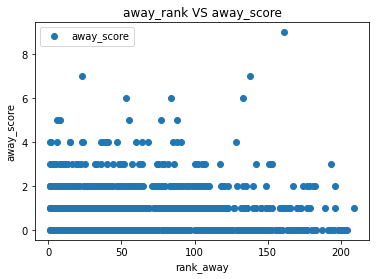

In [ ]:


# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting to see the relationship
df.plot(x='rank_away', y='away_score', style='o')
plt.title('away_rank VS away_score')
plt.xlabel('rank_away')
plt.ylabel('away_score')
plt.show()



# Fit polynomial Regression to the dataset
#poly_reg = PolynomialFeatures(degree = 4) 
#x_away_poly = poly_reg.fit_transform(x_away)

#pol_reg = LinearRegression()
#pol_reg.fit(x_away_poly, y_away)



This relationship is not linear

In [ ]:
# Fit polynomial Regression to the dataset
polynom_reg = PolynomialFeatures(degree = 4) 
x_away_poly = poly_reg.fit_transform(x_away)

polynom_reg = LinearRegression()
polynom_reg.fit(x_away_poly, y_away)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predict using linear regression
regression_line = LinearRegression()
regression_line.fit(x_away,y_away)
lin_pred = regression_line.predict([[35, 94, 2]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[35, 94, 2]]))
print('Polynomial prediction: %d' %poly_pred)


Linear prediction: 0
Polynomial prediction: 2


The results from the world cup ecuador vs venezuela ,linear regression predicted that away team  will score nil and polynomial regression predicted that 2 goals would be scored by away team. I will go with polynomial regression prediction

Cross validation of model 2,

Predicting away score

In [ ]:
#Calculare the Mean Absolute Error,'Mean Squared Error,Root Mean Squared Error
x_away = df[['rank_home', 'rank_away', 'tourn_type']].values
y_away = df['away_score'].values

regressor = LinearRegression()  
regressor.fit(x_away_train, y_away_train)

# assess the accuraccy of the model
y_away_pred = regressor.predict(x_away_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_away_test, y_away_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_away_test, y_away_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_away_test, y_away_pred)))

Mean Absolute Error: 0.7567403073645785
Mean Squared Error: 1.0678664083480636
Root Mean Squared Error: 1.0333762182032562


In [ ]:
#Cross validating model 2
#Cross validation using kFold method
from sklearn.model_selection import KFold

# We will use the same 3 independent variables for this
x_away = df[['rank_home', 'rank_away', 'tourn_type']].values
y_away = df['away_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(x_away)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(x_away):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  x_away_train, x_away_test = x_away[train_index], x_away[test_index]
  y_away_train, y_away_test = y_away[train_index], y_away[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(x_away_train, y_away_train)
  
  # assess the accuraccy of the model
  y_away_pred = regressor.predict(x_away_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_away_test, y_away_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.0500911194426754

Training model 2
Model 2 Root Mean Squared Error: 1.2368291205257038

Training model 3
Model 3 Root Mean Squared Error: 1.1934791519457428

Training model 4
Model 4 Root Mean Squared Error: 0.9981714131744879

Training model 5
Model 5 Root Mean Squared Error: 1.0333762182032562


As you can tell from running the code, the RMSE value for my 3rd model is fairly larger than the RMSE we found initially, and that of the other models. This would beg for an analysis of the specific indeces used.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in our initial approache. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

In [ ]:
np.mean(RMSES)

1.102389404658373

As you can see, the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 4 instead.

Let's now highlight some variants of k-folds. A popular variant is called the leave one out cross validation, where the test data is just a single observation from your set. For a dataset of size n, this is the same as using kfold to create n folds.

9.Plot of  RMSE

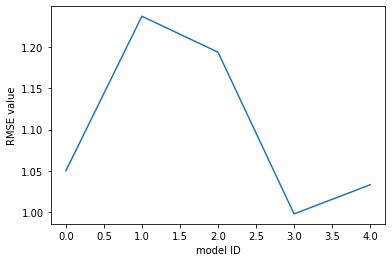

In [ ]:
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

This indicates to us that it would be effective to create a model that beats the ~1.102 average RMSE using this dataset. 

10.Create residual plots for  model 1, and assess its heteroscedasticity using Bartlett’s test

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for results based on our model
home_score_predict = regressor.predict(X_test)
residuals = np.subtract(home_score_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.20049505256129244

Before we interpret the description above, let's recall what we are trying to predict: The home sore goals. This means values between 0 and 1.



mean on the other hand is positive, indicating that i tend to be fairly correct, although slightly over estimating chances by, on average 20%

Let's show the residual plot

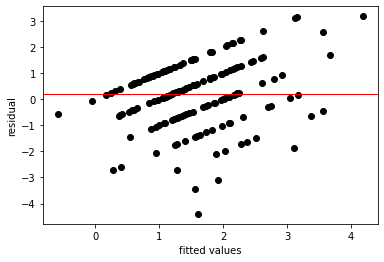

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(home_score_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean, and there are no glaringly obvious patterns. Let mebe thorough though, and perform a heteroskedasticity test.

I will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(home_score_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(home_score_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



2.489811030754257e-09
the variances are homogeneous!


This means that the test result < critical_value

11.Model 2:Predicting the away scores

Create residual plots for model 2, and assess its heteroscedasticity using Bartlett’s test

In [ ]:
x_away = df[['rank_home', 'rank_away', 'tourn_type']].values.reshape(-1,-1)
y_away = df['away_score'].values

x_away_train, y_away_test, y_away_train, y_away_test = train_test_split(x_away, y_away, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_away_train, y_away_train)

# This is our prediction for results based on our model
away_score_predict = regressor.predict(x_away_test)
residuals = np.subtract(away_score_predict, y_away_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()
#


In [ ]:
test_result, p_value = sp.stats.bartlett(away_score_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(away_score_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


1.056056348864763e-48
the variances are homogeneous!


This means that the critical value  > test stastic

12.Feature Engineering

In [ ]:
# Import your necessary dependencies
#Recursive Feature elimination: Recursive feature elimination performs a greedy search to find the best performing feature subset. 
#It iteratively creates models and determines the best or the worst performing feature at each iteration. 
#It constructs the subsequent models with the left features until all the features are explored.
#It then ranks the features based on the order of their elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# convert our data frame objects to numpy array for easier computation

array = df.values
p = array[:,0:8].astype(int)
q= array[:,8]

In [ ]:
# Feature extraction
#Feature Selection is the process of selecting out the most significant features from a given dataset. In many of the cases, 
#Feature Selection can enhance the performance of a machine learning model as well.
#I will choose only 4 factors out of all 12.
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(p, q)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [ True  True False  True False False False  True]
Feature Ranking: [1 1 3 1 4 2 5 1]


The features ranked 1 are the best features to predict with.

13.Hyper parameter Tuning

In [ ]:
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression()

In [ ]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [ ]:
# Fitting grid search
best_model = clf.fit(X, y)

In [ ]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 3593.813663804626


In [ ]:
# Predicting target vector
best_model.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  2,  0,  0,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  2,  1,
        0,  1,  2,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  2,
        0, 31,  0,  2,  1,  2,  0,  0,  1,  1,  2,  1,  1,  1,  1,  1,  0,
        1,  2,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1, 10,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  0,  0,  2,  0,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  0,  2,  1,  0,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  2,  1,  1,  0,  1,  0,  2,  1,  1,  0,  2,  2,  0,  0,
        1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  0,  2,  0,  1,  1,  1,  1, 10,  0,  1,  1,
        2,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  2,  1

14.Logistic Regression

In [ ]:
#Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)
a = df['match_score','rank_home', 'rank_away'].values.reshape(-1,1)
b = df['result'].values.reshape(-1,1)


In [ ]:
#Splitting the dataset into 0.8 for training and 0.2 for testing
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state=0)

In [ ]:
#Since i am no longer using these columns i decided to drop them
df.drop(columns = ['tournament', 'tourn_type'],axis= 1, inplace =True)

In [ ]:
#Drop these unnecessary columns
df.drop(columns = ['home_team', 'away_team'],axis= 1, inplace =True)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(a_train, b_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Using our model to make a prediction
#

b_pred = LogReg.predict(b_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(b_test, b_pred)
confusion_matrix

# The results from the confusion matrix tell us that 52 and 69 are the number of correct predictions. 
# 54 are the number of incorrect predictions.

array([[52,  0,  0],
       [ 0, 69,  0],
       [ 0, 54,  0]])

Cross validation of my logistic model

In [ ]:
#Calculare the Mean Absolute Error,'Mean Squared Error,Root Mean Squared Error
#a = df['match_score', 'rank_home', 'rank_away'].values.reshape(1, -1)
a = df['match_score'].values.reshape(-1,1)
b = df['result'].values.reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(a_train, b_train)

# assess the accuraccy of the model
b_pred = regressor.predict(a_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, b_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(b_test, b_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred)))

Mean Absolute Error: 0.5970441484935861
Mean Squared Error: 0.5350933428900799
Root Mean Squared Error: 0.7315007470194955


In [ ]:
#Cross validating logistic model
#Cross validation using kFold method
from sklearn.model_selection import KFold

# We will use the same 1 independent variables for this
a = df['match_score'].values.reshape(-1,1)
b = df['result'].values.reshape(-1,1)



folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(a)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(a):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  a_train, a_test = a[train_index], a[test_index]
  b_train, b_test = b[train_index], b[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(a_train, b_train)
  
  # assess the accuraccy of the model
  b_pred = regressor.predict(a_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(b_test, b_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.6778634653004032

Training model 2
Model 2 Root Mean Squared Error: 0.7545469265882512

Training model 3
Model 3 Root Mean Squared Error: 0.6729870120817066

Training model 4
Model 4 Root Mean Squared Error: 0.6972761196588079

Training model 5
Model 5 Root Mean Squared Error: 0.6777595328739084


As you can tell from running the code, the RMSE value for my 2nd model is almost similar to the RMSE we found initially, and that of the other models.
The best model here is model 3.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in the initial approach. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

In [ ]:
np.mean(RMSES)

0.6960866113006154

As you can see, the average is less than initial value of 0.75. However in this case, it might be worthwile to pick model 3 instead.

Let's now highlight some variants of k-folds. A popular variant is called the leave one out cross validation, where the test data is just a single observation from your set. For a dataset of size n, this is the same as using kfold to create n folds.

Plot of RMSE

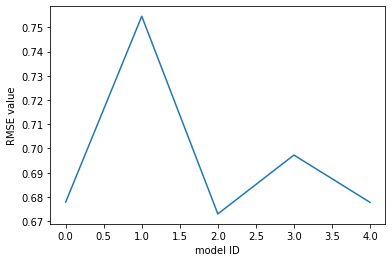

In [ ]:
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

 This indicates to us that it would be effective to create a model that beats the ~0.69 average RMSE using this dataset.

Create residual plots for model 1, and assess its heteroscedasticity using Bartlett’s test

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(a_train, b_train)

# This is our prediction for results based on our model
result_predict = regressor.predict(a_test)
residuals = np.subtract(result_predict, b_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.02576198524008547

Before we interpret the description above, let's recall what we are trying to predict: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D). This means values between 0 and 1.

mean on the other hand is positive, indicating that i tend to be fairly correct, although slightly over estimating chances by, on average 25%


Challenging my solution

In [ ]:
#Since i was able to meet 0.70 accuracy in my model by predicting 121 correctly out of 175, i should still aim for a higher % of accuracy.
#The merge on the two datasets is not as efficient and results to data loss.